In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels . regression . linear_model as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn. preprocessing import LabelEncoder
from sklearn import preprocessing

# FP7 

In [2]:
data = 'Dataset/kc_house_data.csv'

df = pd.read_csv(data)

# Check for missing data
missing_data = df.isnull().sum()
print(missing_data)

# Check if there is any missing data
if missing_data.any():
    print("There is missing data in the dataset.")
else:
    print("There is no missing data in the dataset.")
    
# Check for categorical data
categorical_columns = df.select_dtypes(include=['object']).columns
if not categorical_columns.empty:
    print("Categorical columns in the dataset:", categorical_columns.tolist())
else:
    print("There are no categorical columns in the dataset.")
    
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

# Extract year and month from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Save the updated dataframe to a new CSV file
df.to_csv('Dataset/kc_house_data_with_year_month.csv', index=False)

print(df[['date', 'year', 'month']].head())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
There is no missing data in the dataset.
Categorical columns in the dataset: ['date']
        date  year  month
0 2014-10-13  2014     10
1 2014-12-09  2014     12
2 2015-02-25  2015      2
3 2014-12-09  2014     12
4 2015-02-18  2015      2


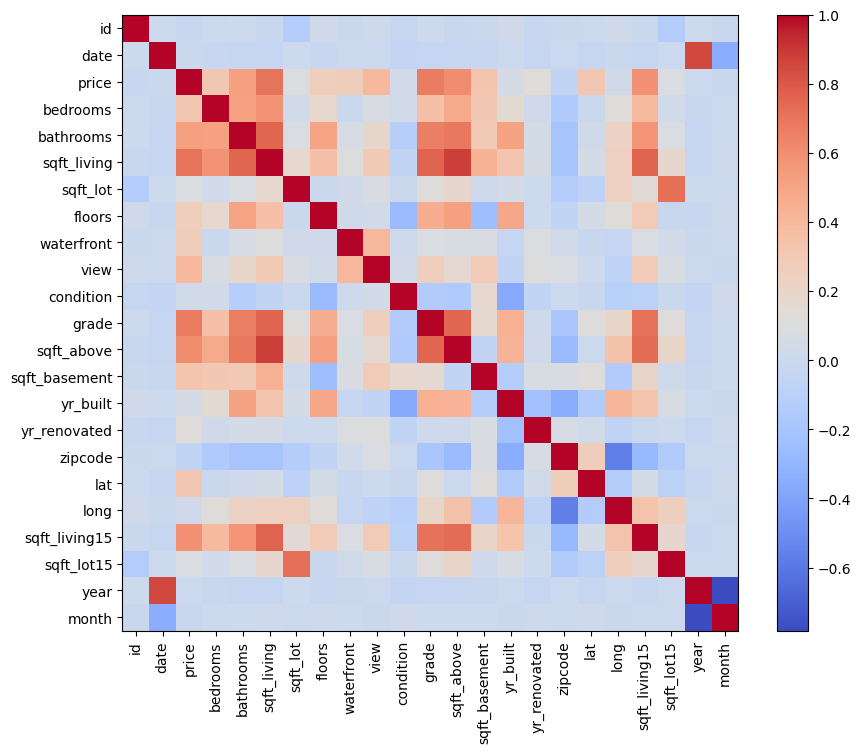

In [3]:
# get correlation
corr = df.corr()

# create heatmap using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [4]:
independent_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month']

X = df [ independent_variables ]
y = df['price']
thresh = 10

for i in np.arange(0, len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values, ix) for ix in range(X[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('vif:', vif)
        print('dropping', X[independent_variables].columns[maxloc], 'at index', maxloc)
        del independent_variables[maxloc]
    else:
        break

print('Final variables:', independent_variables)

c:\Users\diogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\diogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\diogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


vif: [23.352409026856645, 28.61801150421784, inf, 2.382160822790881, 17.392001375437978, 1.2130577998579823, 1.5674316500021783, 35.341183900270615, 148.44863343341885, inf, inf, 10823.289290932093, 1.1997977371998265, 5222762.560098032, 139157.7317294444, 1374670.4706217074, 27.906147135927576, 2.6027371981436422, 4169580.1662525386, 6.203511004328425]
dropping sqft_living at index 2
vif: [23.352409026856584, 28.61801150421784, 2.382160822790881, 17.392001375437875, 1.2130577998579823, 1.5674316500021783, 35.34118390027048, 148.44863343341885, 27.892137213344533, 2.8800389911032136, 10823.289290932093, 1.1997977371998267, 5222762.560098032, 139157.7317294444, 1374670.4706217074, 27.906147135927576, 2.6027371981436414, 4169580.1662525386, 6.203511004327746]
dropping zipcode at index 12
vif: [23.302551382585357, 28.60975902897806, 2.3821264570173097, 17.265650209791357, 1.2127009572978393, 1.556357786131897, 35.05062362259527, 148.22935560589679, 27.86809422401132, 2.87584301715423, 107

In [5]:
for i in np.arange(0, len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values, ix) 
           for ix in range(X[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('vif:', vif)
        print('dropping', X[independent_variables].columns[maxloc], 'at index', maxloc)
        del independent_variables[maxloc]
    else:
        break
print('Final variables:', independent_variables)

Final variables: ['sqft_lot', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_renovated', 'sqft_lot15', 'month']


In [9]:
X = df[['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'year']]
y = df['price']

print('columsn', X.columns)
print('independent_variables', X)

X = X[independent_variables]

std_scale = preprocessing.StandardScaler().fit(X)
X_std = std_scale.transform(X)
minmax_scale = preprocessing.MinMaxScaler().fit(X)
X_minmax = minmax_scale.transform(X)

# Calculating means and standard deviations before standardization
print('Mean before standardization: petal length = {:.1f}, petal width = {:.1f}'.format(X.iloc[:, 0].mean(), X.iloc[:, 1].mean()))
print('SD before standardization: petal length = {:.1f}, petal width = {:.1f}'.format(X.iloc[:, 0].std(), X.iloc[:, 1].std()))

# Calculating means and standard deviations after standardization
print('Mean after standardization: petal length = {:.1f}, petal width = {:.1f}'.format(X_std[:, 0].mean(), X_std[:, 1].mean()))
print('SD after standardization: petal length = {:.1f}, petal width = {:.1f}'.format(X_std[:, 0].std(), X_std[:, 1].std()))

columsn Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')
independent_variables             date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     2014-10-13         3       1.00         1180      5650     1.0   
1     2014-12-09         3       2.25         2570      7242     2.0   
2     2015-02-25         2       1.00          770     10000     1.0   
3     2014-12-09         4       3.00         1960      5000     1.0   
4     2015-02-18         3       2.00         1680      8080     1.0   
...          ...       ...        ...          ...       ...     ...   
21608 2014-05-21         3       2.50         1530      1131     3.0   
21609 2015-02-23         4       2.50         2310      5813     2.0   
21610 2014-06-23        